In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from keras import layers
from keras import models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/base  /content

#Load Dataset

In [ ]:
!cp -r /content/drive/MyDrive/Colab\ Notebooks/BC.s/preprocessing.py  /content

In [ ]:
import preprocessing

In [ ]:
X_train, X_val, y_train, y_val = preprocessing.loadData()

## model

In [ ]:
img_size = 128

In [ ]:
model = tf.keras.applications.MobileNetV2(weights='imagenet',  
    input_shape=(img_size, img_size, 3),
    include_top=False)

In [ ]:
model.trainable = False
base_input = model.layers[0].input
base_output = model.layers[-1].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(256,activation='relu')(Flat_layer)
final_output = layers.Dropout(0.3)(final_output)
final_output = layers.Dense(1, activation='sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

In [ ]:
import math
initial_learning_rate = 0.0001
epochs = 25
decay = initial_learning_rate / epochs
def lr_exp_decay(epoch, lr):
    return lr * 1 / (1 + decay * epoch)

optimizer = keras.optimizers.Adam(learning_rate=initial_learning_rate)
new_model.compile(loss=keras.losses.BinaryCrossentropy(),
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
history = new_model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs = epochs,
    shuffle=True,
    validation_data = (X_val, y_val),
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exp_decay)],
) 

Epoch 1/25
50/50 [==============================] - 5s 57ms/step - loss: 0.4177 - accuracy: 0.8198 - val_loss: 0.1625 - val_accuracy: 0.9294 - lr: 1.0000e-04
Epoch 2/25
50/50 [==============================] - 2s 40ms/step - loss: 0.1303 - accuracy: 0.9571 - val_loss: 0.1039 - val_accuracy: 0.9672 - lr: 1.0000e-04
Epoch 3/25
50/50 [==============================] - 2s 39ms/step - loss: 0.0895 - accuracy: 0.9741 - val_loss: 0.0868 - val_accuracy: 0.9723 - lr: 9.9999e-05
Epoch 4/25
50/50 [==============================] - 2s 40ms/step - loss: 0.0752 - accuracy: 0.9789 - val_loss: 0.0967 - val_accuracy: 0.9622 - lr: 9.9998e-05
Epoch 5/25
50/50 [==============================] - 2s 40ms/step - loss: 0.0605 - accuracy: 0.9814 - val_loss: 0.0925 - val_accuracy: 0.9697 - lr: 9.9996e-05
Epoch 6/25
50/50 [==============================] - 2s 39ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0843 - val_accuracy: 0.9735 - lr: 9.9994e-05
Epoch 7/25
50/50 [==============================] - 

In [ ]:
new_model.save('./mobileNet.h5', overwrite=True)

# plot acc

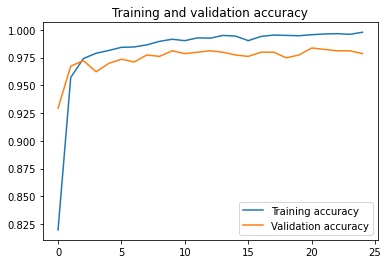

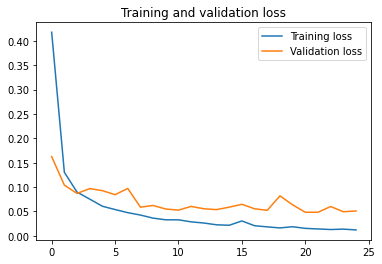

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
prediction

array([[0.05504772]], dtype=float32)

In [ ]:
vgg_pred_classes = np.argmax(prediction, axis=1)

In [ ]:
vgg_pred_classes

array([0], dtype=int64)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
test_data_dir = '../dataset/test'
test_generator = ImageDataGenerator(rescale=1./255)
testgen = test_generator.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),
    class_mode=None,
    batch_size=1,
    shuffle=False)

Found 545 images belonging to 2 classes.


In [ ]:
import numpy as np
true_classes = testgen.classes
vgg_preds = new_model.predict(testgen).round()


In [ ]:
vgg_pred_classes = np.max(vgg_preds, axis=1)
vgg_pred_classes

array([1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [ ]:
from sklearn.metrics import accuracy_score

vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy without Fine-Tuning: {:.2f}%".format(vgg_acc * 100))

VGG16 Model Accuracy without Fine-Tuning: 89.36%
